In [ ]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# Open the FITS file
filename = "Test Raytrace.fits"
with fits.open(filename) as hdul:
    data = hdul[0].data  # Assuming the image data is in the first extension


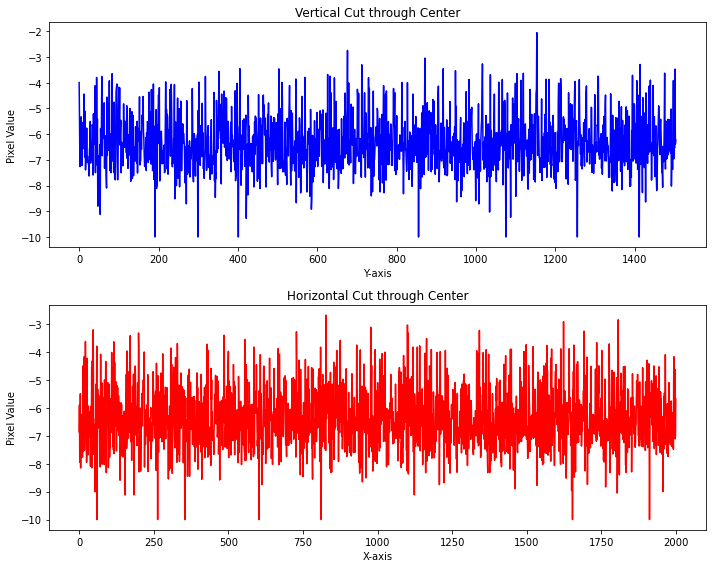

In [ ]:
# Get the dimensions of the image
y_size, x_size = data.shape

# Calculate the center indices
x_center = x_size // 2
y_center = y_size // 2

# Extract the horizontal and vertical cuts
vertical_cut = data[:, x_center]
horizontal_cut = data[y_center, :]

# Plot the cuts
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].plot(np.arange(y_size), vertical_cut, color='blue')
ax[0].set_title('Vertical Cut through Center')
ax[0].set_xlabel('Y-axis')
ax[0].set_ylabel('Pixel Value')

ax[1].plot(np.arange(x_size), horizontal_cut, color='red')
ax[1].set_title('Horizontal Cut through Center')
ax[1].set_xlabel('X-axis')
ax[1].set_ylabel('Pixel Value')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open the JPG file
filename = "Test Raytrace.jpeg"
image = Image.open(filename)
data = np.array(image)  # Convert the image to a numpy array

# Check if the image is in color (3 channels), and convert to grayscale if necessary
if data.ndim == 3:
    data = np.mean(data, axis=2)  # Convert to grayscale by averaging the color channels



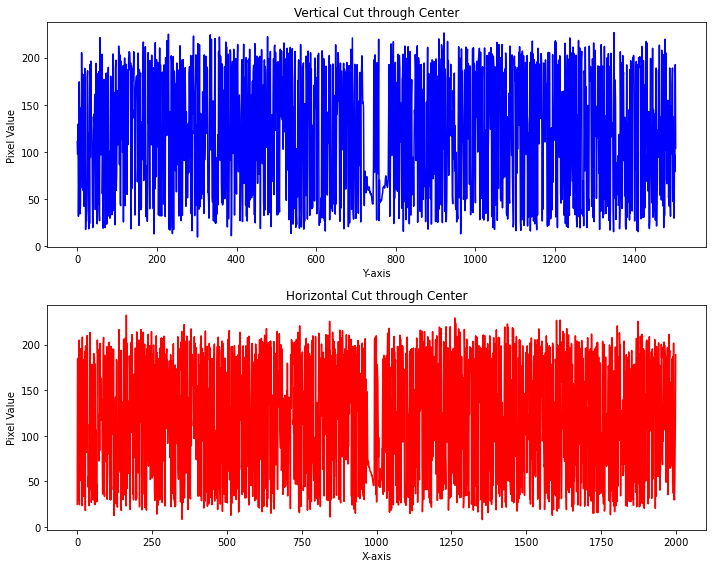

In [ ]:
# Get the dimensions of the image
y_size, x_size = data.shape

# Calculate the center indices
x_center = x_size // 2
y_center = y_size // 2

# Extract the horizontal and vertical cuts
vertical_cut = data[:, x_center]
horizontal_cut = data[y_center, :]

# Plot the cuts
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].plot(np.arange(y_size), vertical_cut, color='blue')
ax[0].set_title('Vertical Cut through Center')
ax[0].set_xlabel('Y-axis')
ax[0].set_ylabel('Pixel Value')

ax[1].plot(np.arange(x_size), horizontal_cut, color='red')
ax[1].set_title('Horizontal Cut through Center')
ax[1].set_xlabel('X-axis')
ax[1].set_ylabel('Pixel Value')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from scipy.special import gamma

# Define constants
A = 610.322 * (1e-4)**2 * (1e3)  # [A^2 µm] * 1e-4 to convert from Angstrom in the paper to µm for FRED; ditto for 1e3 to convert from mm to µm
B = 120 * 1e3  # [µm] * 1e3 to convert from mm in the paper to µm for FRED
C = 1.089  # [unitless?]

# Frequency variable (f)
f = np.logspace(-6, 2, 1000)  # range specified by SUVI paper figure 6. / 1000 to convert from the 1/mm in the paper to 1/µm

# Calculate K
K = (1 / (2 * np.sqrt(np.pi))) * (gamma((C + 1) / 2) / gamma(C / 2))

# Calculate PSD
PSD_2D = (K * A * B) / ((1 + (B * f)**2)**((C + 1) / 2))

# Calculate log10(f)
log_f = np.log10(f)
log_psd = np.log10(PSD_2D)

import numpy as np
import pandas as pd

# Assuming f_micrometer and PSD_2D_micrometer are already calculated
# f_micrometer: frequency array in 1/µm
# PSD_2D_micrometer: PSD values in A^2 µm^2

# Create a DataFrame with the frequency and PSD data
df = pd.DataFrame({
    'f [1/µm]': log_f,
    'PSD_2D [A^2 µm^2]': log_psd
})

# Specify the header lines
header_lines = [
    "type tabulatedpsd",
    "format [log10]"
]

# Save the DataFrame to a CSV file with the header lines
with open('tabulated_psd_log10both.txt', 'w') as file:
    # Write the custom header lines
    file.write('\n'.join(header_lines) + '\n')
    
    # Write the DataFrame to the file without the default header
    df.to_csv(file, sep='\t', index=False, header=True)



In [ ]:
import numpy as np
from scipy.special import gamma

# Define constants
A = 610.322 * (1e-4)**2 * (1e3) # [A^2 µm] * 1e-4 to convert from Angstrom in the paper to µm for FRED; ditto for 1e3 to convert from mm to µm
B = 120  * 1e3 # [µm] * 1e3 to convert from mm in the paper to µm for FRED
C = 1.089  # [unitless?]

# Frequency variable (f)
f = np.logspace(-6, 2, 1000) # range specified by SUVI paper figure 6. / 1000 to convert from the 1/mm in the paper to 1/µm

# Calculate K
K = (1 / (2 * np.sqrt(np.pi))) * (gamma((C + 1) / 2) / gamma(C / 2))

# Calculate PSD
PSD_2D = (K * A * B) / ((1 + (B * f)**2)**((C + 1) / 2))

# Output the result (for example, print or plot)
print(PSD_2D)


[1.21769312e+02 1.21701522e+02 1.21631263e+02 1.21558449e+02
 1.21482990e+02 1.21404793e+02 1.21323762e+02 1.21239799e+02
 1.21152802e+02 1.21062666e+02 1.20969282e+02 1.20872539e+02
 1.20772322e+02 1.20668511e+02 1.20560986e+02 1.20449619e+02
 1.20334281e+02 1.20214839e+02 1.20091154e+02 1.19963086e+02
 1.19830489e+02 1.19693215e+02 1.19551108e+02 1.19404011e+02
 1.19251762e+02 1.19094195e+02 1.18931139e+02 1.18762419e+02
 1.18587855e+02 1.18407263e+02 1.18220456e+02 1.18027239e+02
 1.17827416e+02 1.17620786e+02 1.17407141e+02 1.17186272e+02
 1.16957964e+02 1.16721997e+02 1.16478149e+02 1.16226193e+02
 1.15965896e+02 1.15697025e+02 1.15419339e+02 1.15132598e+02
 1.14836555e+02 1.14530962e+02 1.14215567e+02 1.13890116e+02
 1.13554352e+02 1.13208016e+02 1.12850849e+02 1.12482588e+02
 1.12102972e+02 1.11711737e+02 1.11308619e+02 1.10893357e+02
 1.10465688e+02 1.10025353e+02 1.09572094e+02 1.09105654e+02
 1.08625783e+02 1.08132233e+02 1.07624761e+02 1.07103130e+02
 1.06567109e+02 1.060164

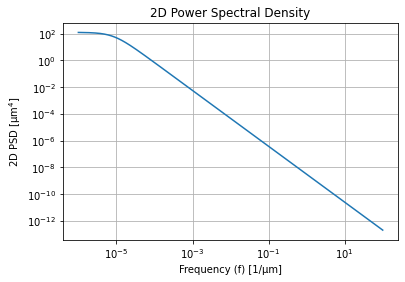

In [ ]:
import matplotlib.pyplot as plt

# Plot the PSD function
plt.loglog(f, PSD_2D)
plt.xlabel('Frequency (f) [1/µm]')
plt.ylabel('2D PSD [µm$^4$]')
plt.title('2D Power Spectral Density')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Assuming f_micrometer and PSD_2D_micrometer are already calculated
# f_micrometer: frequency array in 1/µm
# PSD_2D_micrometer: PSD values in A^2 µm^2

# Create a DataFrame with the frequency and PSD data
df = pd.DataFrame({
    'f [1/µm]': f,
    'PSD_2D [A^2 µm^2]': PSD_2D
})

# Specify the header lines
header_lines = [
    "type tabulatedpsd",
    "format"
]

# Save the DataFrame to a CSV file with the header lines
with open('tabulated_psd.txt', 'w') as file:
    # Write the custom header lines
    file.write('\n'.join(header_lines) + '\n')
    
    # Write the DataFrame to the file without the default header
    df.to_csv(file, sep='\t', index=False, header=True)
